In [33]:
import xarray as xr
import geopandas as gpd
import pandas as pd
import numpy as np
import salem
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from netCDF4 import num2date
from scipy import stats

In [70]:
dat = xr.open_dataset('/media/ck/Elements/SouthAmerica/rio_santa_WRF/timeseries/precip_finalcorrection_fixed_a_monthly_daily_d02_RioSanta_fullValley_snowmask_BC.nc')

In [110]:
aug = dat.shift(time=-5).sel(time=((dat['time.month']==8)&(dat['time.day']>=15))|((dat['time.month']==9)&(dat['time.day']<=15)))

-0.1216599190283401 13.567948717948719 -0.3402877878076656 0.03403379150454959 0.05526836150110746


Text(0.5, 1.0, '-4.745|0.034')

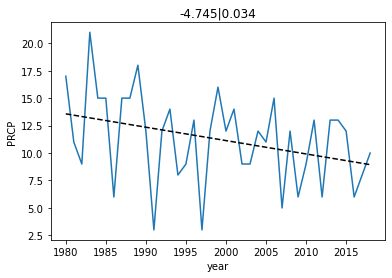

In [111]:
ccount = aug['PRCP'].where(aug['PRCP']>0.5).groupby('time.year').count()
ccount.plot()
cslope, cint, crval, cpval, cerr = stats.linregress(np.arange(len(ccount.year)), ccount.values)
print(cslope, cint, crval, cpval, cerr)
plt.plot(ccount.year, cint + np.arange(len(ccount.year)) * cslope, linestyle='dashed', color='k')
plt.title(str(np.round(cslope*len(ccount.year),3))+'|'+str(np.round(cpval,3)))

-0.11821862348178139 8.938461538461539 -0.3635684273905543 0.02290037485306331 0.04979814908875852


Text(0.5, 1.0, '-4.611|0.023')

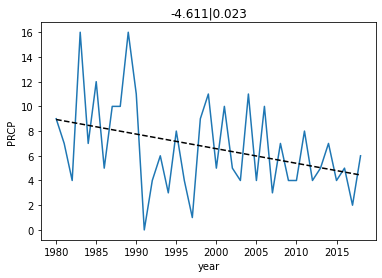

In [113]:
dayy = aug['PRCP'].resample({'time':'D'}).sum()
ccount = dayy.where(dayy>1).groupby('time.year').count()
ccount.plot()
cslope, cint, crval, cpval, cerr = stats.linregress(np.arange(len(ccount.year)), ccount.values)
print(cslope, cint, crval, cpval, cerr)
plt.plot(ccount.year, cint + np.arange(len(ccount.year)) * cslope, linestyle='dashed', color='k')
plt.title(str(np.round(cslope*len(ccount.year),3))+'|'+str(np.round(cpval,3)))

In [99]:
dat2 = xr.open_dataset('/media/ck/Elements/SouthAmerica/rio_santa_WRF/timeseries/wrfout_fullTS_fullValley_snowmask_d02.nc')

In [105]:
aug2 = dat2.shift(time=-5).sel(time=((dat2['time.month']==8)&(dat2['time.day']>=15))|((dat2['time.month']==9)&(dat2['time.day']<=15)))

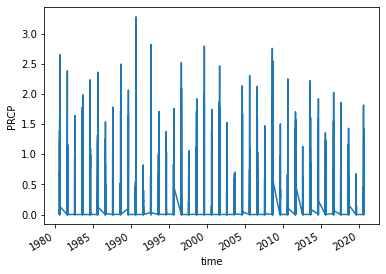

In [106]:
aug2['PRCP'].plot()

-0.29512195121951224 19.243902439024392 -0.34037371389133747 0.029440551558238583 0.1305494735506613


Text(0.5, 1.0, '-12.1|0.029')

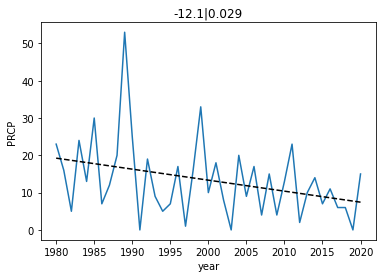

In [107]:
ccount = aug2['PRCP'].where(aug2['PRCP']>1).groupby('time.year').count()
ccount.plot()
cslope, cint, crval, cpval, cerr = stats.linregress(np.arange(len(ccount.year)), ccount.values)
print(cslope, cint, crval, cpval, cerr)
plt.plot(ccount.year, cint + np.arange(len(ccount.year)) * cslope, linestyle='dashed', color='k')

plt.title(str(np.round(cslope*len(ccount.year),3))+'|'+str(np.round(cpval,3)))

-0.16376306620209052 13.519163763066201 -0.4164595331731245 0.006760032782482308 0.05724643216187332


Text(0.5, 1.0, '-6.714|0.007')

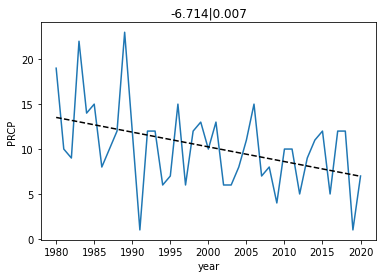

In [108]:
day = aug2['PRCP'].resample({'time':'D'}).max()
ccount = day.where(day>0.5).groupby('time.year').count()
ccount.plot()
cslope, cint, crval, cpval, cerr = stats.linregress(np.arange(len(ccount.year)), ccount.values)
print(cslope, cint, crval, cpval, cerr)
plt.plot(ccount.year, cint + np.arange(len(ccount.year)) * cslope, linestyle='dashed', color='k')
plt.title(str(np.round(cslope*len(ccount.year),3))+'|'+str(np.round(cpval,3)))

-0.21324041811846692 23.118466898954708 -0.4499647262499679 0.003159731667427059 0.0677692597031928


Text(0.5, 1.0, '-8.743|0.003')

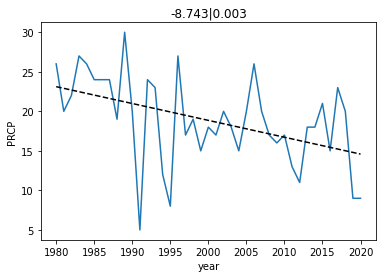

In [119]:
day = aug2['PRCP'].resample({'time':'D'}).sum()
ccount = day.where(day>0.5).groupby('time.year').count()

ccount.plot()
cslope, cint, crval, cpval, cerr = stats.linregress(np.arange(len(ccount.year)), ccount.values)
print(cslope, cint, crval, cpval, cerr)
plt.plot(ccount.year, cint + np.arange(len(ccount.year)) * cslope, linestyle='dashed', color='k')

plt.title(str(np.round(cslope*len(ccount.year),3))+'|'+str(np.round(cpval,3)))

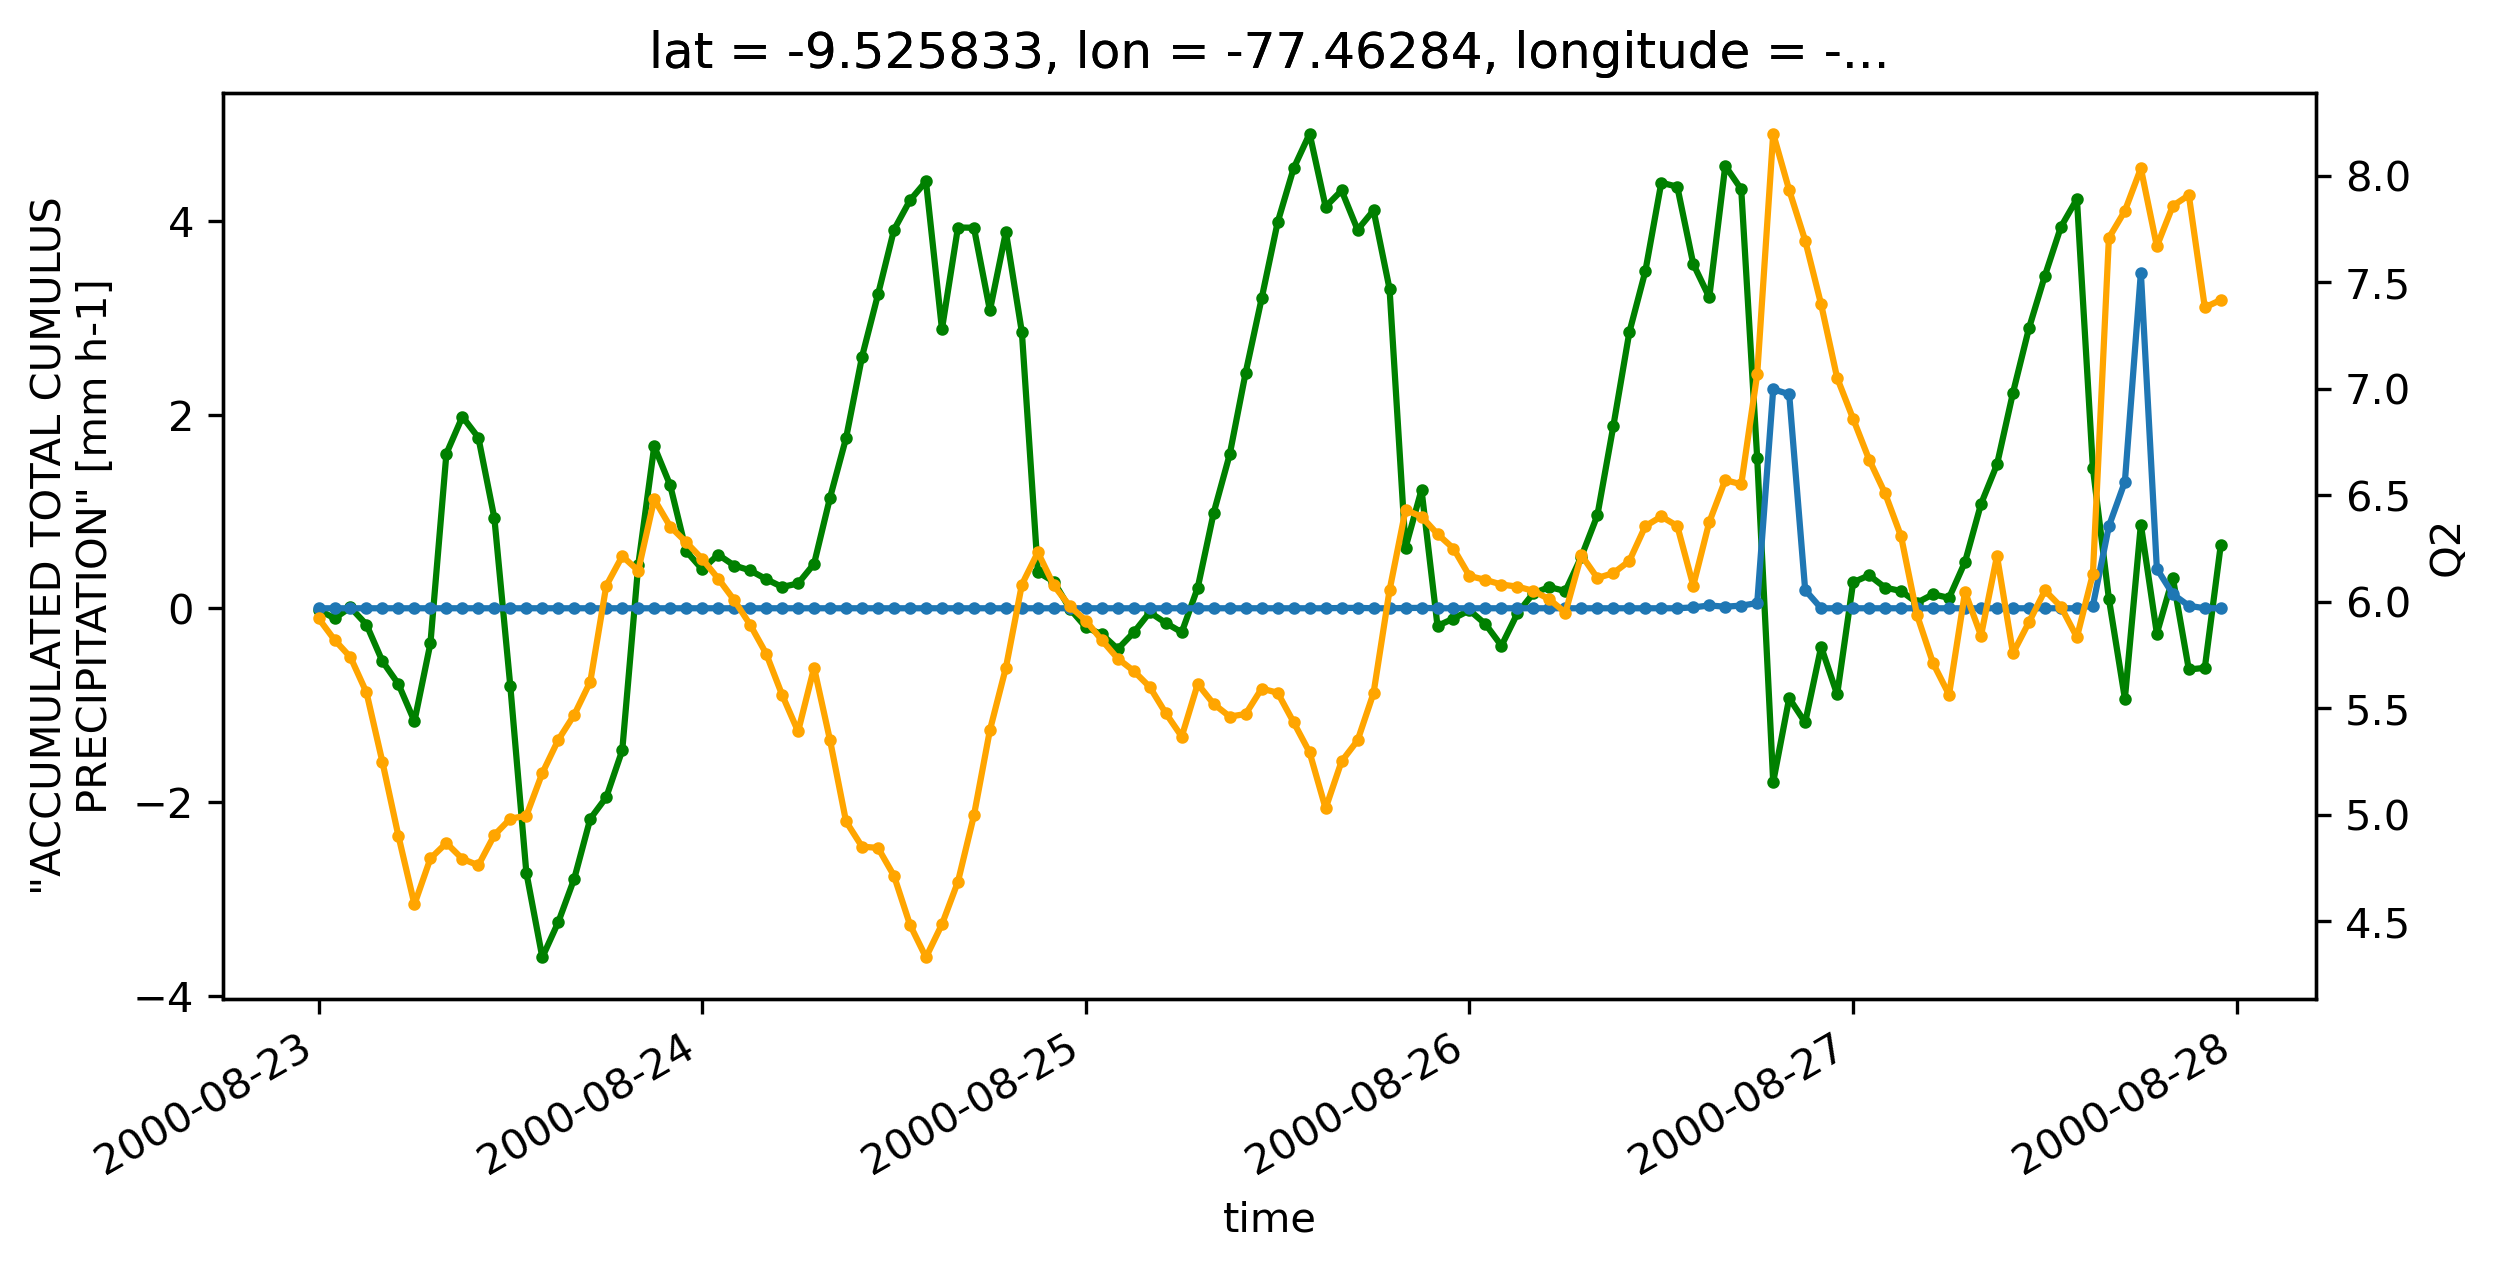

In [184]:
f = plt.figure(figsize=(9,4), dpi=300)
ax = f.add_subplot(111)

(aug2['U10']).plot(marker='o', ms=2, color='green')
(aug2['PRCP']).plot(marker='o', ms=2)
ax2 = ax.twinx()
(aug2['Q2']*1000).plot(color='orange', marker='o', ms=2)
#ax2.axhline(85, color='k')

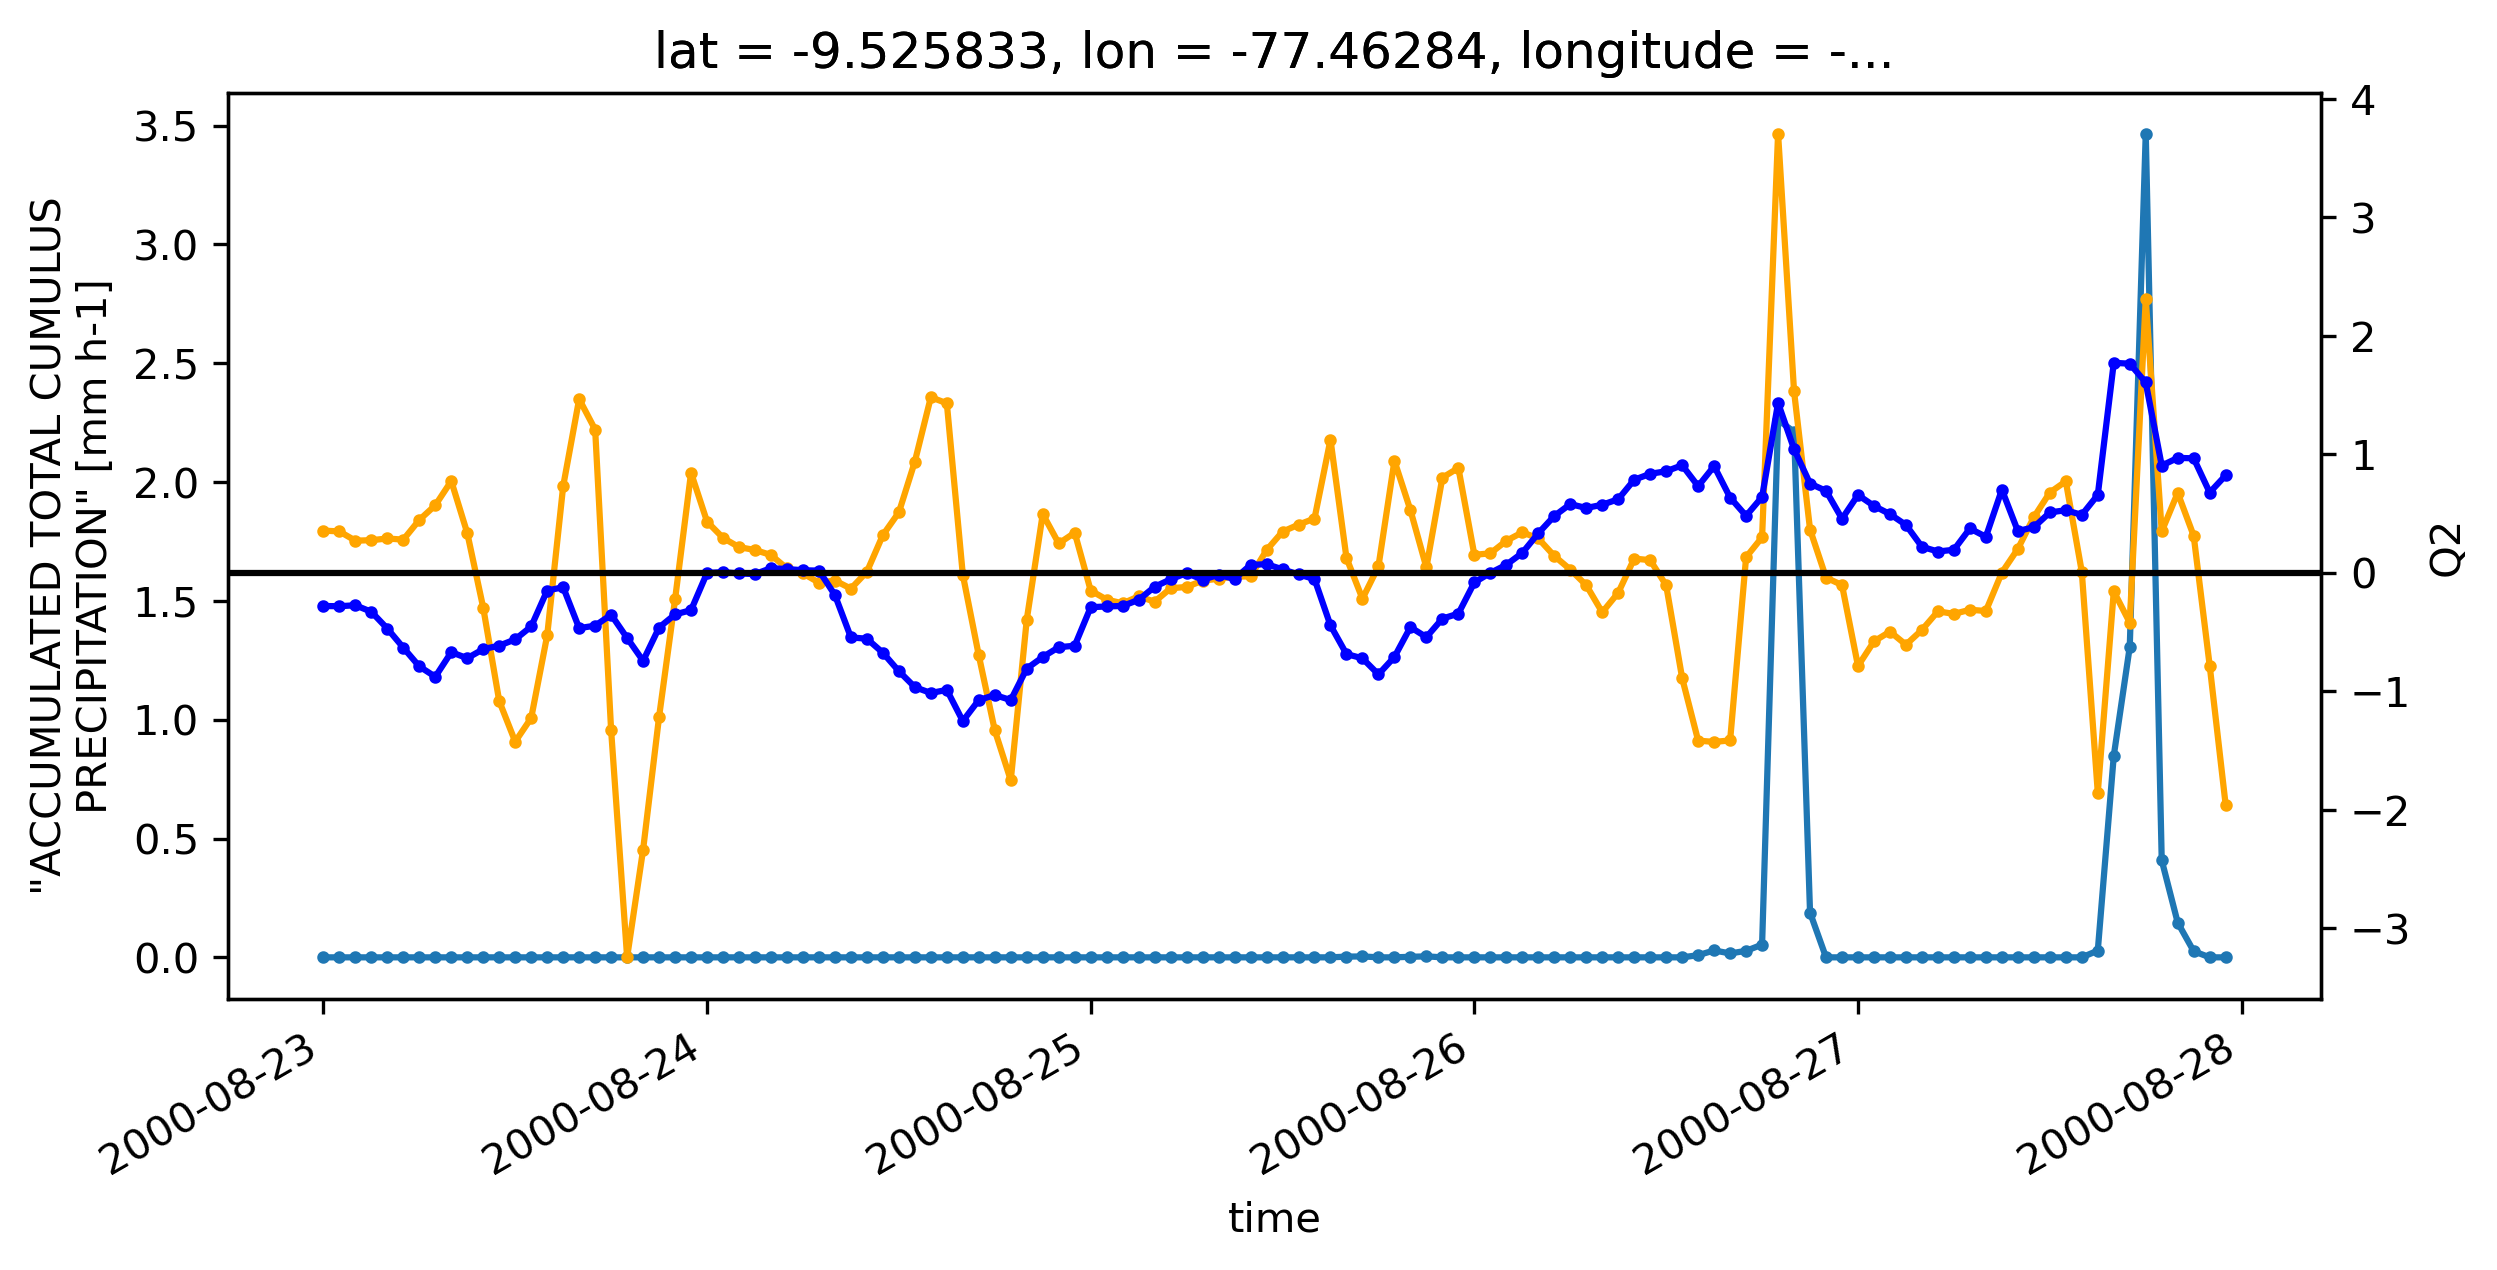

In [190]:
f = plt.figure(figsize=(9,4), dpi=300)
ax = f.add_subplot(111)
(aug2['PRCP']).plot(marker='o', ms=2)
ax2 = ax.twinx()
((aug2['V10'].groupby('time.hour')-aug2['V10'].groupby('time.hour').mean())).plot(color='orange', marker='o', ms=2)
((aug2['Q2'].groupby('time.hour')-aug2['Q2'].groupby('time.hour').mean())*1000).plot(color='b', marker='o', ms=2)
ax2.axhline(0, color='k')

In [10]:
late_aug2 = aug2.sel(time=aug2['time.day']>15)

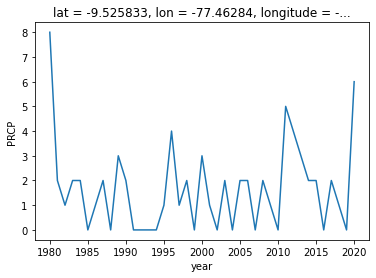

In [16]:
late_aug2.where(late_aug2>2).groupby('time.year').count().plot()

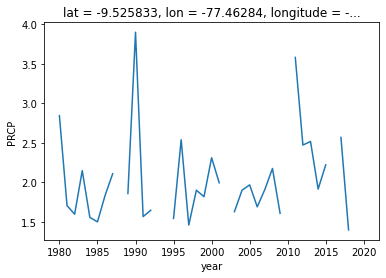

In [14]:
late_aug2.where(late_aug2>1).groupby('time.year').mean().plot()